In [1]:
import os
import numpy as np
from os import makedirs

BBO_experiments_dict = {
    "BBO SC/DP 10 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/02.01_optim_HOMO_shg_count_dp_10_steps",
    "BBO SC/DP 50 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/02.02_optim_HOMO_shg_count_dp_50_steps",
    "BBO SC/DP 10 obabel": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/02.03_optim_HOMO_shg_count_dp_10_steps_obabel",
    "BBO MBTR/RBF 10 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/03.01_optim_HOMO_mbtr_rbf_10_steps",
    "BBO MBTR/RBF 50 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/03.02_optim_HOMO_mbtr_rbf_50_steps",
    "BBO MBTR/RBF 10 obabel": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/03.03_optim_HOMO_mbtr_rbf_10_steps_obabel",
    "BBO MBTR/DP 10 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/04.01_optim_HOMO_mbtr_dp_10_steps",
    "BBO MBTR/DP 50 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/04.02_optim_HOMO_mbtr_dp_50_steps",
    "BBO MBTR/DP 10 obabel": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/04.03_optim_HOMO_mbtr_dp_10_steps_obabel",
    "BBO SC/DP QM9 init": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/02.04_optim_HOMO_shg_count_dp_10_steps_init_rand_QM9",
    "BBO MBTR/RBF QM9 init": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/03.04_optim_HOMO_mbtr_rbf_10_steps_init_rand_QM9",
}

EvoMol_experiments_dict = {
    "EvoMol rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.01_EvoMol_from_methane_optim_HOMO_rdkit_nocache",
    "EvoMol obabel": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.02_EvoMol_from_methane_optim_HOMO_obabel_nocache",
    "EvoMol QM9 init": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.03_EvoMol_from_methane_optim_HOMO_rdkit_nocache_init_rand_QM9",
    "EvoMol QM9 init pop 600": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.04_EvoMol_from_methane_optim_HOMO_rdkit_nocache_init_rand_QM9_pop_600"
}

output_figures_root = os.environ["FIGURES"] + "/07_BBO/03_bbo_optim/paper/10.01_results"
makedirs(output_figures_root, exist_ok=True)

sub_experiments_names = [str(i) for i in range(1, 11)]

ECDF_TARGETS = np.arange(-10, -1, 0.01)
ERT_TARGETS = np.arange(-10, -1, 0.5)

In [2]:
groups = [
    
    (
        "",
        ["BBO SC/DP 10 rdkit", "BBO MBTR/RBF 10 rdkit", "EvoMol rdkit"],
        {
            "EvoMol rdkit": "Evolutionary optimization only",
            "BBO SC/DP 10 rdkit": "BBO(Shingles, ·)",
            "BBO MBTR/RBF 10 rdkit": "BBO(MBTR, RBF)",
        },
        [0, 0, 1],
        [None, None, None]
    ),
    
    
    (
        "10 EvoMol steps",
        ["EvoMol rdkit", "BBO SC/DP 10 rdkit", "BBO MBTR/RBF 10 rdkit", "BBO MBTR/DP 10 rdkit"],
        {
            "EvoMol rdkit": "Evolutionary optimization only",
            "BBO SC/DP 10 rdkit": "BBO (Shingles,·)",
            "BBO MBTR/RBF 10 rdkit": "BBO (MBTR,RBF)",
            "BBO MBTR/DP 10 rdkit": "BBO (MBTR,·)",
        },
        [1, 0, 0, 0],
        [None, None, None, None]
    ),
    (
        "50 EvoMol steps",
        ["EvoMol rdkit", "BBO SC/DP 50 rdkit", "BBO MBTR/RBF 50 rdkit", "BBO MBTR/DP 50 rdkit"],
        {
            "EvoMol rdkit": "Evolutionary optimization only",
            "BBO SC/DP 50 rdkit": "BBO (Shingles,·)",
            "BBO MBTR/RBF 50 rdkit": "BBO (MBTR,RBF)",
            "BBO MBTR/DP 50 rdkit": "BBO (MBTR,·)"
        },
        [1, 0, 0, 0],
        [None, None, None, None]
    ),
    (
        "MM",
        ["EvoMol rdkit", "EvoMol obabel", "BBO SC/DP 10 rdkit", "BBO SC/DP 10 obabel", "BBO MBTR/RBF 10 rdkit",  
         "BBO MBTR/RBF 10 obabel", "BBO MBTR/DP 10 rdkit", "BBO MBTR/DP 10 obabel"],
        {
        },
        [0, 1, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 1, 2, 2, 3, 3]
    ),
    (
        "QM9 init",
        ["BBO SC/DP 10 rdkit", "BBO SC/DP QM9 init", "BBO MBTR/RBF 10 rdkit", "BBO MBTR/RBF QM9 init", 
         "EvoMol rdkit", "EvoMol QM9 init", "EvoMol QM9 init pop 600"],
        {
            
        },
        [0, 0, 1, 1, 2, 2, 2],
        [0, 1, 0, 1, 0, 1, 1]
    )
    
    
    
]


In [3]:
from bbomol.postprocessing.postprocessing import extract_multiple_BBO_experiments_data, extract_multiple_evomol_experiments_data

def extract_all_data(BBO_experiments_dict, EvoMol_experiments_dict, sub_experiments_names):
    
    results_dict = {}
    
    for exp_name, path in BBO_experiments_dict.items():
        results_dict[exp_name] = extract_multiple_BBO_experiments_data(path, sub_experiments_names)
        
    for exp_name, path in EvoMol_experiments_dict.items():
        results_dict[exp_name] = extract_multiple_evomol_experiments_data(path, sub_experiments_names)

    return results_dict

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from bbomol.postprocessing.evaluation import compute_ecdf, compute_best_so_far_matrix

from os.path import join
import pandas as pd
from matplotlib.ticker import FuncFormatter
linestyles = ['solid', 'dashed', 'dotted', 'dashdot', (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (1, 10))]
markers = ['s', '^', 'o', '+', 'x']
from math import floor


def plot_best_so_far(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None, 
                     classes_dashes=None, classes_markers=None, metric="mean"):
    
    plt.figure(figsize=(7, 5))
    
    if plot_title is not None:        
        plt.title(plot_title)
    
    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
        
    for i, experiment_name in enumerate(exp_list_plot):
        
        if experiment_name in exp_list_plot:
            
            if labels_dict is not None and experiment_name in labels_dict:
                display_experiment_name = labels_dict[experiment_name]
            else:
                display_experiment_name = experiment_name
                
               
            max_obj_calls = np.max([np.max(obj_calls_vect) for obj_calls_vect in results_dict[experiment_name]["dataset_success_n_calls"]])
                
            obj_calls, best_so_far_matrix = compute_best_so_far_matrix(
                results_dict[experiment_name]["dataset_success_n_calls"],
                results_dict[experiment_name]["dataset_success_obj_value"],
                max_obj_calls=max_obj_calls
            )
            
            
            if classes_dashes is None:
                linestyle = linestyles[0]
            else:
                linestyle = linestyles[classes_dashes[i]]
                
            if classes_markers is None:
                marker = None
            else:
                marker = markers[classes_markers[i]] if classes_markers[i] is not None else None
            
            if metric == "mean" or metric == "both":
                plt.plot(obj_calls, best_so_far_matrix.mean(axis=0), label=display_experiment_name, 
                         linestyle=linestyle, markevery=100)
                plt.ylabel("Best HOMO (eV)")
            if metric == "min_max" or metric == "both":
                plt.fill_between(obj_calls, best_so_far_matrix.min(axis=0), best_so_far_matrix.max(axis=0),
                                 alpha=0.2)
#                                  label=display_experiment_name, )

                
        
    plt.legend(loc="lower left")
    plt.xlim(1, 1000)
#     plt.ylim(0, 1)
    plt.xlabel("Number of DFT calls")
    plt.savefig(join(output_figures_root, "best_so_far_" + metric + "_" + plot_title +".png"), dpi=600)
    plt.show()
    

def plot_ECDF(results_dict, plot_title=None, exp_list_plot=None, exp_list_details=None, labels_dict=None, 
              classes_dashes=None, classes_markers=None):
    
    colors = sns.color_palette()
    
    plt.figure(figsize=(7, 3))
#     fig, ax = plt.subplots()
#     ax2 = ax.twinx()
#     ax.get_shared_y_axes().join(ax,ax2)
    
    if plot_title is not None:        
        plt.title(plot_title)
    
    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
        
    for i, experiment_name in enumerate(exp_list_plot):
        
        if experiment_name in exp_list_plot:
            
            if labels_dict is not None and experiment_name in labels_dict:
                display_experiment_name = labels_dict[experiment_name]
            else:
                display_experiment_name = experiment_name
        
            for j in range(len(results_dict[experiment_name]["dataset_success_n_calls"])):

                if exp_list_details is not None and experiment_name in exp_list_details:
                    obj_calls, ecdf_vect = compute_ecdf(
                        obj_calls_list=[results_dict[experiment_name]["dataset_success_n_calls"][j]],
                        obj_values_list=[results_dict[experiment_name]["dataset_success_obj_value"][j]],
                        targets=ECDF_TARGETS
                    )
                    sns.lineplot(obj_calls, ecdf_vect, label=display_experiment_name, color=colors[i], 
                                 dashes=[(2, 2)], style=True)
                    plt.scatter([obj_calls[-1]], [ecdf_vect[-1]], color="black")

            obj_calls, ecdf_vect = compute_ecdf(
                obj_calls_list=results_dict[experiment_name]["dataset_success_n_calls"],
                obj_values_list=results_dict[experiment_name]["dataset_success_obj_value"],
                targets=ECDF_TARGETS
            )
            
            if classes_dashes is None:
                linestyle = linestyles[0]
            else:
                linestyle = linestyles[classes_dashes[i]]
                
            if classes_markers is None:
                marker = None
            else:
                marker = markers[classes_markers[i]] if classes_markers[i] is not None else None
                
            plt.plot(obj_calls, ecdf_vect, label=display_experiment_name, linestyle=linestyle, markevery=100)
    
    
    plt.legend(loc="lower right")
    plt.xlim(1, 1000)
    plt.ylim(0.4, 0.9)
    plt.xlabel("# calls to QM calculations")
    plt.ylabel("Proportion of targets achieved")
#     plt.hlines(0.7788, 0, 1000)
    
#     ax2.yaxis.set_major_formatter(FuncFormatter(lambda x,pos: f"{ECDF_TARGETS[int(x*len(ECDF_TARGETS))]:.0f}" if x<1 else ""))
    
#     ax2 = plt.twinx()
#     ax2.set_ylim(min(ECDF_TARGETS), max(ECDF_TARGETS))
#     ax2.set_ylabel("HOMO energy (eV)")
    
    plt.savefig(join(output_figures_root, "ecdf_" + plot_title +".png"), dpi=600, bbox_inches='tight')
    plt.show()

In [5]:
from bbomol.postprocessing.evaluation import compute_timestamps_ecdf

def plot_ECDF_timestamps(results_dict, plot_title=None, exp_list_plot=None, exp_list_details=None,
                         labels_dict=None, classes_dashes=None, classes_markers=None):
    
    colors = sns.color_palette()
    
    plt.figure(figsize=(7, 5))
    
    if plot_title is not None:        
        plt.title(plot_title)
    
    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
        
    for i, experiment_name in enumerate(exp_list_plot):
        
        if experiment_name in exp_list_plot:
            
            if labels_dict is not None and experiment_name in labels_dict:
                display_experiment_name = labels_dict[experiment_name]
            else:
                display_experiment_name = experiment_name
                
            for j in range(len(results_dict[experiment_name]["timestamps"])):

                if exp_list_details is not None and experiment_name in exp_list_details:
                    obj_calls, ecdf_vect = compute_ecdf(
                        obj_calls_list=[results_dict[experiment_name]["timestamps"][j]],
                        obj_values_list=[results_dict[experiment_name]["best_scores_timestamps"][j]],
                        targets=ECDF_TARGETS
                    )
                    sns.lineplot(obj_calls/3600, ecdf_vect, label=display_experiment_name, color=colors[i], 
                                 dashes=[(2, 2)], style=True)
                    plt.scatter([obj_calls[-1]], [ecdf_vect[-1]], color="black")
                

            obj_calls, ecdf_vect = compute_timestamps_ecdf(
                timestamps_list=results_dict[experiment_name]["timestamps"],
                obj_values_list=results_dict[experiment_name]["best_scores_timestamps"],
                targets=ECDF_TARGETS
            )
            
            if classes_dashes is None:
                linestyle = linestyles[0]
            else:
                linestyle = linestyles[classes_dashes[i]]
                
            if classes_markers is None:
                marker = None
            else:
                marker = markers[classes_markers[i]] if classes_markers[i] is not None else None
                
            plt.plot(obj_calls/3600, ecdf_vect, label=display_experiment_name, linestyle=linestyle, markevery=100)
    
    
    plt.legend(loc="lower right")
    plt.xlim(0, 60)
    plt.ylim(0, 1)
    plt.xlabel("Time (h)")
    plt.ylabel("Proportion of targets achieved")
#     ax2 = plt.twinx()
#     ax2.set_ylim(min(ECDF_TARGETS), max(ECDF_TARGETS))
#     ax2.set_ylabel("HOMO energy (eV)")
    
    plt.savefig(join(output_figures_root, "ecdf_timestamps" + plot_title +".png"), dpi=600)
    plt.show()

In [6]:
from bbomol.postprocessing.evaluation import compute_ERT, compute_ERT_timestamps
import pandas as pd
from IPython.display import display, HTML

def display_ERT(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None):
    
    output_keys = ["Experiment"] + [str(value) for value in ERT_TARGETS]
    ERT_dict = {output_key: [] for output_key in output_keys}
    
    if plot_title is not None:
        display(HTML("<h3>" + plot_title +"</h3>"))

    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
    
    for i, experiment_name in enumerate(exp_list_plot):
        
        if labels_dict is not None and experiment_name in labels_dict:
            display_experiment_name = labels_dict[experiment_name]
        else:
            display_experiment_name = experiment_name
        
        ERT_vect = compute_ERT(
            obj_calls_list=results_dict[experiment_name]["dataset_success_n_calls"],
            obj_values_list=results_dict[experiment_name]["dataset_success_obj_value"],
            targets=ERT_TARGETS
        )
        
        ERT_dict["Experiment"].append(display_experiment_name)
        for j in range(len(ERT_vect)):
            ERT_dict[output_keys[j+1]].append(ERT_vect[j])
    
    df = pd.DataFrame.from_dict(ERT_dict)
    display(df)
    
    
def display_ERT_timestamps(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None):
    
    output_keys = ["Experiment"] + [str(value) for value in ERT_TARGETS]
    ERT_dict = {output_key: [] for output_key in output_keys}
    
    if plot_title is not None:
        display(HTML("<h3>" + plot_title +"</h3>"))

    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
    
    for i, experiment_name in enumerate(exp_list_plot):
        
        if labels_dict is not None and experiment_name in labels_dict:
            display_experiment_name = labels_dict[experiment_name]
        else:
            display_experiment_name = experiment_name
                    
        ERT_vect = compute_ERT_timestamps(
            timestamps_list=results_dict[experiment_name]["timestamps"],
            obj_values_list=results_dict[experiment_name]["best_scores_timestamps"],
            targets=ERT_TARGETS,
            effective_last_timestamp_list=results_dict[experiment_name]["effective_last_timestamp"]
        )
        
        ERT_dict["Experiment"].append(display_experiment_name)
        for j in range(len(ERT_vect)):
            ERT_dict[output_keys[j+1]].append(ERT_vect[j])
    
    df = pd.DataFrame.from_dict(ERT_dict)
    display(df)

In [7]:
import itertools

def display_stable_proportion(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None):
    
    output_keys = ["Experiment", "# Stable", "# Generated", "Stable proportion (%)", "# Unique stable",
                   "# Unique generated", "Unique stable proportion (%)", "Unique stable ∩ unstable"]
    output_dict = {output_key: [] for output_key in output_keys}
    
    if plot_title is not None:
        display(HTML("<h3>" + plot_title +"</h3>"))

    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
        
    for i, experiment_name in enumerate(exp_list_plot):

        if labels_dict is not None and experiment_name in labels_dict:
            display_experiment_name = labels_dict[experiment_name]
        else:
            display_experiment_name = experiment_name
            
        stable_smiles = list(itertools.chain(*results_dict[experiment_name]["dataset_success_smiles"]))
        unstable_smiles = list(itertools.chain(*results_dict[experiment_name]["dataset_failed_smiles"]))
            
        stable_smiles_unique = list(np.unique(stable_smiles))
        unstable_smiles_unique = list(np.unique(unstable_smiles))
        
        intersection = np.intersect1d(stable_smiles_unique, unstable_smiles_unique)
            
        n_stable = len(stable_smiles)
        n_unstable = len(unstable_smiles)
        n_unique_stable = len(stable_smiles_unique)
        n_unique_unstable = len(unstable_smiles_unique)
        
        total_smiles = n_stable + n_unstable
        total_unique_smiles = n_unique_stable + n_unique_unstable

        stable_prop = n_stable / total_smiles * 100
        unique_stable_prop = n_unique_stable / total_unique_smiles * 100
        
        output_dict["Experiment"].append(display_experiment_name)
        
        output_dict["# Stable"].append(n_stable)
        output_dict["# Generated"].append(total_smiles)
        output_dict["Stable proportion (%)"].append(stable_prop)

        output_dict["# Unique stable"].append(n_unique_stable)
        output_dict["# Unique generated"].append(total_unique_smiles)
        output_dict["Unique stable proportion (%)"].append(unique_stable_prop)
        
        output_dict["Unique stable ∩ unstable"].append(len(intersection))
    
    df = pd.DataFrame.from_dict(output_dict)
    display(df)
    
def plot_stable_dynamics(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None,
                         classes_dashes=None, classes_markers=None):
    
    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
    
    plt.figure(figsize=(8, 6))
    plt.xscale("linear")
    
    for i, experiment_name in enumerate(exp_list_plot):

        if labels_dict is not None and experiment_name in labels_dict:
            display_experiment_name = labels_dict[experiment_name]
        else:
            display_experiment_name = experiment_name
            
        stable_n_calls = np.array(list(itertools.chain(*results_dict[experiment_name]["dataset_success_n_calls"])))
        unstable_n_calls = np.array(list(itertools.chain(*results_dict[experiment_name]["dataset_failed_n_calls"])))
        ecdf = np.zeros((1000,))
        
        for j in range(1000):
            ecdf[j] = np.sum(unstable_n_calls <=j)

            
        if classes_dashes is None:
            linestyle = linestyles[0]
        else:
            linestyle = linestyles[classes_dashes[i]]

        if classes_markers is None:
            marker = None
        else:
            marker = markers[classes_markers[i]] if classes_markers[i] is not None else None
            
        plt.plot(np.arange(1000), ecdf, label=display_experiment_name, linestyle=linestyle, marker=marker,
                 markevery=100)
        plt.xlabel("# DFT calls")
        plt.ylabel("# unstable solutions (cumulative)")
    
    plt.legend()
    plt.savefig(join(output_figures_root, "unstable_cumulative_" + plot_title +".png"), dpi=300)
    plt.show()
        


In [8]:
def display_times(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None):

    output_keys = ["Experiment", "Mean step time", "Mean optim. time", "Mean desc. obj. comput. time"]
    output_dict = {output_key: [] for output_key in output_keys}
    
    if plot_title is not None:
        display(HTML("<h3>" + plot_title +"</h3>"))

    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())

    for i, experiment_name in enumerate(exp_list_plot):

        if labels_dict is not None and experiment_name in labels_dict:
            display_experiment_name = labels_dict[experiment_name]
        else:
            display_experiment_name = experiment_name
            
        if "steps_step_duration" in results_dict[experiment_name]:
            mean_step_time = np.mean(list(itertools.chain(*results_dict[experiment_name]["steps_step_duration"])))
            mean_optim_time = np.mean(list(itertools.chain(*results_dict[experiment_name]["steps_optim_duration"])))
            mean_desc_obj_time = np.mean(list(itertools.chain(*results_dict[experiment_name]["steps_desc_obj_comput_duration"])))
        else:
            mean_step_time = None
            mean_optim_time = None
            mean_desc_obj_time = None
        
        output_dict["Experiment"].append(display_experiment_name)
        output_dict["Mean step time"].append(mean_step_time)
        output_dict["Mean optim. time"].append(mean_optim_time)
        output_dict["Mean desc. obj. comput. time"].append(mean_desc_obj_time)
        
    df = pd.DataFrame.from_dict(output_dict)
    display(df)
        

In [9]:
results_dict = extract_all_data(BBO_experiments_dict, EvoMol_experiments_dict, sub_experiments_names)

# Best so far  (mean)

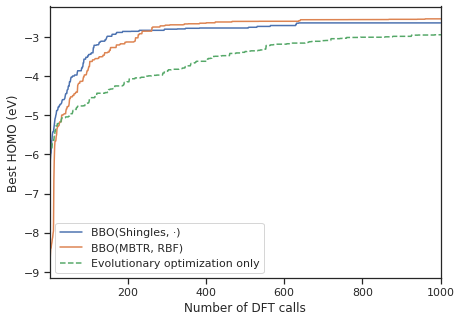

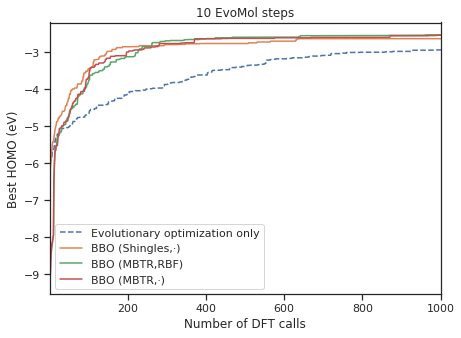

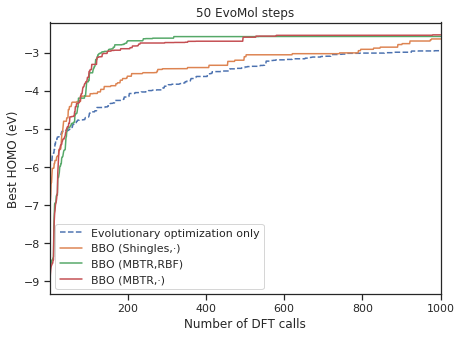

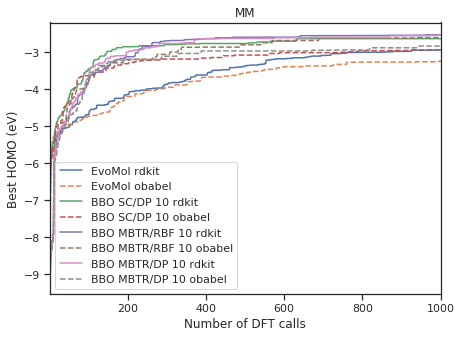

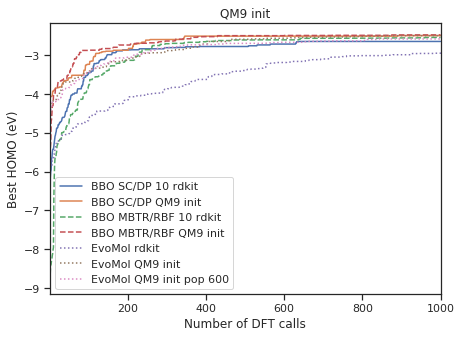

In [10]:
for group in groups:
    plot_best_so_far(results_dict, group[0], group[1], labels_dict=group[2], classes_dashes=group[3],
                     classes_markers=group[4], metric="mean")

# Best so far (min_max)

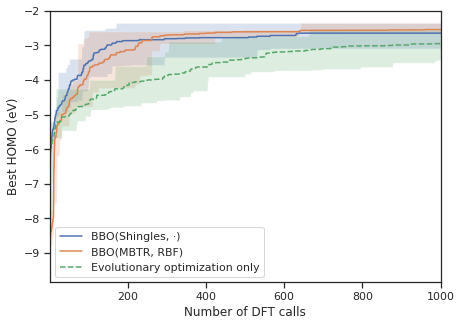

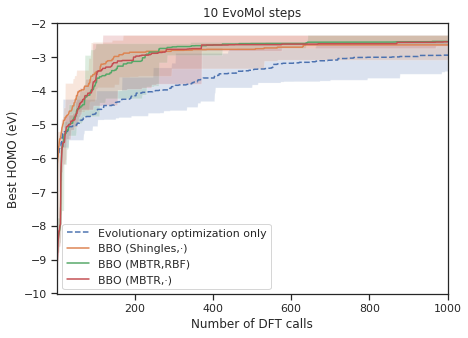

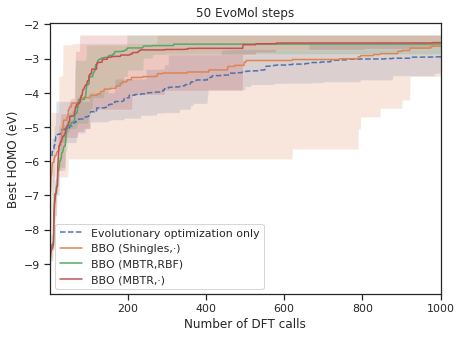

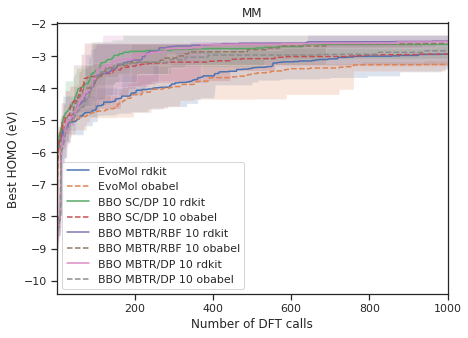

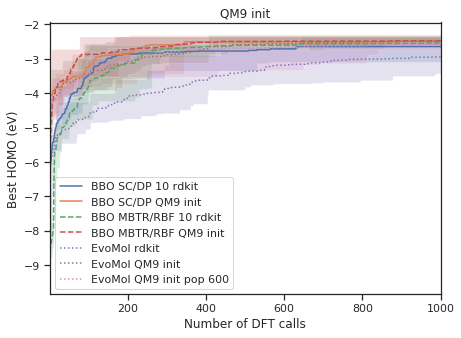

In [11]:
for group in groups:
    plot_best_so_far(results_dict, group[0], group[1], labels_dict=group[2], classes_dashes=group[3],
                     classes_markers=group[4], metric="both")

# ECDF (Empirical cumulative distribution functions)

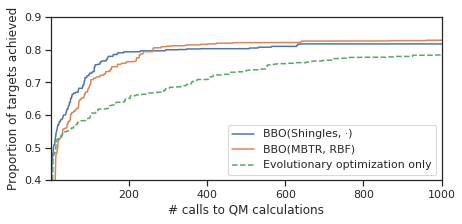

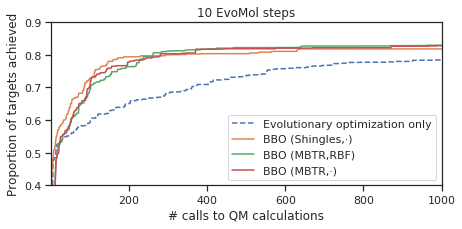

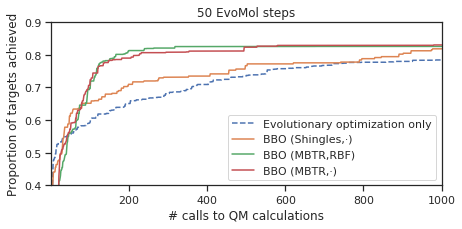

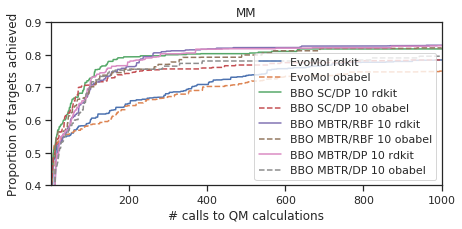

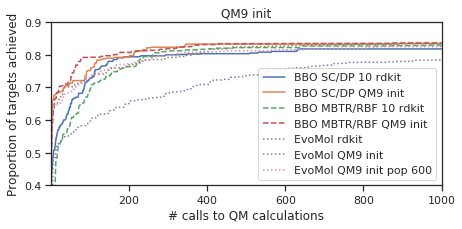

In [12]:
for group in groups:
    plot_ECDF(results_dict, group[0], group[1], labels_dict=group[2], classes_dashes=group[3],
              classes_markers=group[4])

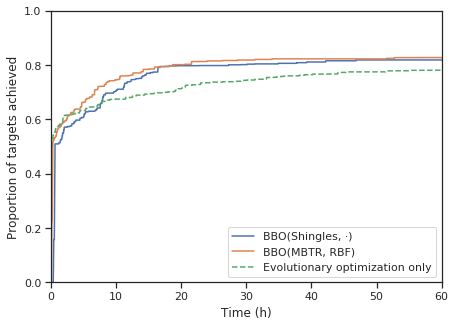

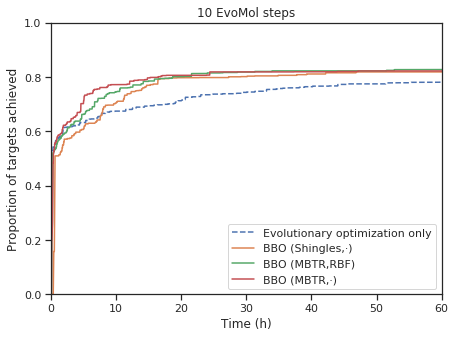

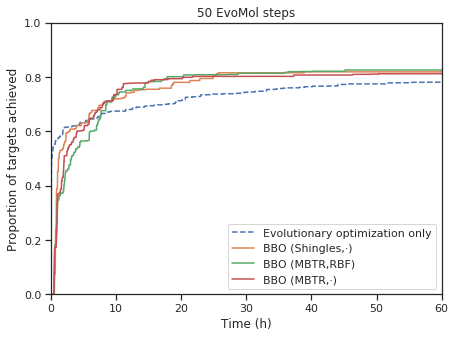

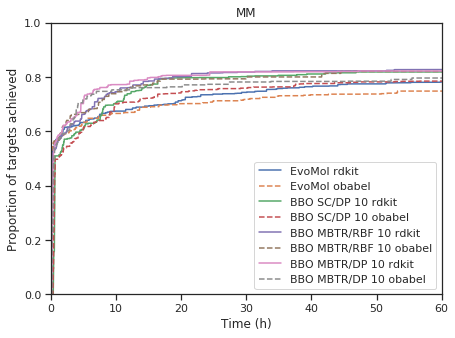

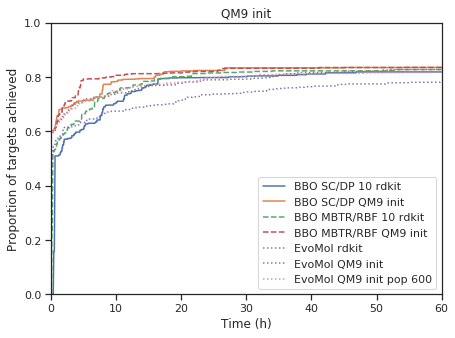

In [13]:
for group in groups:
    plot_ECDF_timestamps(results_dict, group[0], group[1], labels_dict=group[2], classes_dashes=group[3],
              classes_markers=group[4])

# ERT (Expected running time)

In [14]:
for group in groups:
    display_ERT(results_dict, group[0], group[1], labels_dict=group[2])

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0                BBO(Shingles, ·)    1.0   1.0   1.1   1.1   1.9   2.3   2.3   
1                  BBO(MBTR, RBF)    1.0   1.0   1.4   4.4   9.2  11.9  12.1   
2  Evolutionary optimization only    1.6   1.6   2.0   2.0   2.0   2.0   2.0   

   -6.5  -6.0  -5.5  -5.0   -4.5   -4.0   -3.5         -3.0         -2.5  \
0   2.5   2.9   5.5  18.2   47.3   63.5  132.0   376.555556  1822.500000   
1  12.5  13.3  17.3  32.4   68.4  107.9  166.5   177.400000  3151.333333   
2   4.1   5.3  10.5  45.6  170.4  235.1  522.9  1185.666667          inf   

   -2.0  -1.5  
0   inf   inf  
1   inf   inf  
2   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0  Evolutionary optimization only    1.6   1.6   2.0   2.0   2.0   2.0   2.0   
1                BBO (Shingles,·)    1.0   1.0   1.1   1.1   1.9   2.3   2.3   
2                  BBO (MBTR,RBF)    1.0   1.0   1.4   4.4   9.2  11.9  12.1   
3                    BBO (MBTR,·)    1.0   1.7   2.4   5.2   9.4  10.6  11.4   

   -6.5  -6.0  -5.5  -5.0   -4.5   -4.0   -3.5         -3.0         -2.5  \
0   4.1   5.3  10.5  45.6  170.4  235.1  522.9  1185.666667          inf   
1   2.5   2.9   5.5  18.2   47.3   63.5  132.0   376.555556  1822.500000   
2  12.5  13.3  17.3  32.4   68.4  107.9  166.5   177.400000  3151.333333   
3  11.7  14.7  17.4  31.1   63.4   85.3  159.8   173.100000  4490.000000   

   -2.0  -1.5  
0   inf   inf  
1   inf   inf  
2   inf   inf  
3   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  \
0  Evolutionary optimization only    1.6   1.6   2.0   2.0   2.0   2.0   2.0   
1                BBO (Shingles,·)    1.3   1.3   1.4   1.4   2.0   2.9   4.0   
2                  BBO (MBTR,RBF)    1.0   1.1   1.5   6.2  11.5  12.3  13.2   
3                    BBO (MBTR,·)    1.0   1.0   1.9   8.0  11.5  12.7  15.5   

   -6.5  -6.0   -5.5   -5.0   -4.5   -4.0        -3.5         -3.0  \
0   4.1   5.3   10.5   45.6  170.4  235.1  522.900000  1185.666667   
1   4.0  17.3  104.9  122.4  178.1  238.7  411.222222   465.666667   
2  22.3  31.0   39.2   52.1   79.8   95.5  116.800000   133.400000   
3  21.1  23.9   28.8   52.3   82.7  112.2  141.400000   163.900000   

          -2.5  -2.0  -1.5  
0          inf   inf   inf  
1  2886.666667   inf   inf  
2  4215.500000   inf   inf  
3  4207.000000   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  -6.5  \
0            EvoMol rdkit    1.6   1.6   2.0   2.0   2.0   2.0   2.0   4.1   
1           EvoMol obabel    1.4   1.4   1.9   2.5   2.5   2.5   2.7   3.2   
2      BBO SC/DP 10 rdkit    1.0   1.0   1.1   1.1   1.9   2.3   2.3   2.5   
3     BBO SC/DP 10 obabel    1.1   1.1   1.1   1.1   2.1   2.4   2.4   2.5   
4   BBO MBTR/RBF 10 rdkit    1.0   1.0   1.4   4.4   9.2  11.9  12.1  12.5   
5  BBO MBTR/RBF 10 obabel    1.0   1.0   1.6   3.7   8.5   9.9  11.3  11.5   
6    BBO MBTR/DP 10 rdkit    1.0   1.7   2.4   5.2   9.4  10.6  11.4  11.7   
7   BBO MBTR/DP 10 obabel    1.5   1.6   1.6   3.9   9.7  10.6  11.4  12.8   

   -6.0  -5.5  -5.0   -4.5   -4.0   -3.5         -3.0         -2.5  -2.0  -1.5  
0   5.3  10.5  45.6  170.4  235.1  522.9  1185.666667          inf   inf   inf  
1   3.3   5.1  30.9  196.9  333.4  491.7          inf          inf   inf   inf  
2   2.9   5.5  18.2   47.3   63.5  132.0   376.555556  1822.500000   inf   inf  
3   4.3  11.8  22.9   51.7   76.0  200.5  1120.666667          inf   inf   inf  
4  13.3  17.3  32.4   68.4  107.9  166.5   177.400000  3151.333333   inf   inf  
5  11.6  12.3  14.8   62.7   86.2  110.2   399.300000          inf   inf   inf  
6  14.7  17.4  31.1   63.4   85.3  159.8   173.100000  4490.000000   inf   inf  
7  16.5  22.6  32.2   78.8   97.5  119.2   860.142857          inf   inf   inf

Experiment  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.0  -6.5  \
0       BBO SC/DP 10 rdkit    1.0   1.0   1.1   1.1   1.9   2.3   2.3   2.5   
1       BBO SC/DP QM9 init    1.5   1.5   1.5   1.5   1.5   1.5   1.5   1.5   
2    BBO MBTR/RBF 10 rdkit    1.0   1.0   1.4   4.4   9.2  11.9  12.1  12.5   
3    BBO MBTR/RBF QM9 init    1.1   1.1   1.1   1.1   1.1   1.1   1.1   1.2   
4             EvoMol rdkit    1.6   1.6   2.0   2.0   2.0   2.0   2.0   4.1   
5          EvoMol QM9 init    1.5   1.5   1.5   1.5   1.5   1.5   1.5   1.5   
6  EvoMol QM9 init pop 600    1.5   1.5   1.5   1.5   1.5   1.5   1.5   1.5   

   -6.0  -5.5  -5.0   -4.5   -4.0   -3.5         -3.0         -2.5  -2.0  -1.5  
0   2.9   5.5  18.2   47.3   63.5  132.0   376.555556  1822.500000   inf   inf  
1   1.5   1.7   2.1    2.3   10.1   93.4   145.500000  1868.750000   inf   inf  
2  13.3  17.3  32.4   68.4  107.9  166.5   177.400000  3151.333333   inf   inf  
3   1.2   2.9   5.1    9.4   23.4   55.9    87.500000  1411.000000   inf   inf  
4   5.3  10.5  45.6  170.4  235.1  522.9  1185.666667          inf   inf   inf  
5   1.5   1.5   1.9    7.1   35.2   83.8   258.000000  1636.400000   inf   inf  
6   1.5   1.5   1.7   12.9   31.3  118.0   266.400000  4654.000000   inf   inf

## ERT Timestamps

In [15]:
for group in groups:
    display_ERT_timestamps(results_dict, group[0], group[1], labels_dict=group[2])

Experiment   -10.0    -9.5    -9.0    -8.5    -8.0  \
0                BBO(Shingles, ·)  1850.0  1850.0  1850.0  1850.0  1850.0   
1                  BBO(MBTR, RBF)   380.0   380.0   380.0   380.0   670.0   
2  Evolutionary optimization only   110.0   110.0   130.0   130.0   130.0   

     -7.5    -7.0    -6.5    -6.0    -5.5    -5.0     -4.5     -4.0      -3.5  \
0  1850.0  1850.0  1850.0  1850.0  2750.0  6860.0  22020.0  27560.0   49170.0   
1   870.0   870.0   870.0   930.0  1130.0  3820.0  13680.0  25220.0   37960.0   
2   130.0   130.0   160.0   240.0   380.0  2350.0  21090.0  33550.0  107710.0   

            -3.0          -2.5  -2.0  -1.5  
0  100288.435866  3.926314e+05   inf   inf  
1   40590.000000  1.283809e+06   inf   inf  
2  267243.028123           inf   inf   inf

Experiment   -10.0    -9.5    -9.0    -8.5    -8.0  \
0  Evolutionary optimization only   110.0   110.0   130.0   130.0   130.0   
1                BBO (Shingles,·)  1850.0  1850.0  1850.0  1850.0  1850.0   
2                  BBO (MBTR,RBF)   380.0   380.0   380.0   380.0   670.0   
3                    BBO (MBTR,·)   390.0   390.0   390.0   390.0   700.0   

     -7.5    -7.0    -6.5    -6.0    -5.5    -5.0     -4.5     -4.0      -3.5  \
0   130.0   130.0   160.0   240.0   380.0  2350.0  21090.0  33550.0  107710.0   
1  1850.0  1850.0  1850.0  1850.0  2750.0  6860.0  22020.0  27560.0   49170.0   
2   870.0   870.0   870.0   930.0  1130.0  3820.0  13680.0  25220.0   37960.0   
3   900.0   950.0   950.0  1050.0  1230.0  2510.0   9660.0  14510.0   30990.0   

            -3.0          -2.5  -2.0  -1.5  
0  267243.028123           inf   inf   inf  
1  100288.435866  3.926314e+05   inf   inf  
2   40590.000000  1.283809e+06   inf   inf  
3   33580.000000  1.388199e+06   inf   inf

Experiment   -10.0    -9.5    -9.0    -8.5    -8.0  \
0  Evolutionary optimization only   110.0   110.0   130.0   130.0   130.0   
1                BBO (Shingles,·)  2730.0  2730.0  2730.0  2730.0  2730.0   
2                  BBO (MBTR,RBF)  1880.0  1880.0  1880.0  2310.0  3320.0   
3                    BBO (MBTR,·)  1790.0  1790.0  1790.0  2440.0  3300.0   

     -7.5    -7.0    -6.5    -6.0     -5.5     -5.0     -4.5     -4.0  \
0   130.0   130.0   160.0   240.0    380.0   2350.0  21090.0  33550.0   
1  2730.0  2830.0  2830.0  3670.0   4780.0   6570.0  21290.0  32020.0   
2  3320.0  3320.0  7350.0  9420.0  11990.0  17000.0  26820.0  33690.0   
3  3300.0  3300.0  5920.0  6730.0   8150.0  13890.0  26320.0  43160.0   

            -3.5           -3.0          -2.5  -2.0  -1.5  
0  107710.000000  267243.028123           inf   inf   inf  
1   55079.845767   63679.845767  3.630329e+05   inf   inf  
2   43650.000000   52420.000000  2.277999e+06   inf   inf  
3   54840.000000   62480.000000  1.834010e+06   inf   inf

Experiment   -10.0    -9.5    -9.0    -8.5    -8.0    -7.5  \
0            EvoMol rdkit   110.0   110.0   130.0   130.0   130.0   130.0   
1           EvoMol obabel   100.0   100.0   120.0   140.0   140.0   140.0   
2      BBO SC/DP 10 rdkit  1850.0  1850.0  1850.0  1850.0  1850.0  1850.0   
3     BBO SC/DP 10 obabel  1640.0  1640.0  1640.0  1640.0  1640.0  1640.0   
4   BBO MBTR/RBF 10 rdkit   380.0   380.0   380.0   380.0   670.0   870.0   
5  BBO MBTR/RBF 10 obabel   510.0   510.0   510.0   510.0  1050.0  1230.0   
6    BBO MBTR/DP 10 rdkit   390.0   390.0   390.0   390.0   700.0   900.0   
7   BBO MBTR/DP 10 obabel   450.0   450.0   450.0   450.0   860.0  1120.0   

     -7.0    -6.5    -6.0    -5.5    -5.0     -4.5     -4.0      -3.5  \
0   130.0   160.0   240.0   380.0  2350.0  21090.0  33550.0  107710.0   
1   150.0   160.0   160.0   200.0  1340.0  21010.0  56190.0  103070.0   
2  1850.0  1850.0  1850.0  2750.0  6860.0  22020.0  27560.0   49170.0   
3  1640.0  1640.0  1960.0  4900.0  9970.0  25210.0  34870.0   66000.0   
4   870.0   870.0   930.0  1130.0  3820.0  13680.0  25220.0   37960.0   
5  1400.0  1400.0  1400.0  1400.0  1400.0  11480.0  19240.0   25330.0   
6   950.0   950.0  1050.0  1230.0  2510.0   9660.0  14510.0   30990.0   
7  1180.0  1180.0  1320.0  1950.0  2850.0  11880.0  16740.0   22790.0   

           -3.0          -2.5  -2.0  -1.5  
0  2.672430e+05           inf   inf   inf  
1           inf           inf   inf   inf  
2  1.002884e+05  3.926314e+05   inf   inf  
3  2.527341e+05           inf   inf   inf  
4  4.059000e+04  1.283809e+06   inf   inf  
5  8.679000e+04           inf   inf   inf  
6  3.358000e+04  1.388199e+06   inf   inf  
7  1.826062e+05           inf   inf   inf

Experiment   -10.0    -9.5    -9.0    -8.5    -8.0    -7.5  \
0       BBO SC/DP 10 rdkit  1850.0  1850.0  1850.0  1850.0  1850.0  1850.0   
1       BBO SC/DP QM9 init   100.0   100.0   100.0   100.0   100.0   100.0   
2    BBO MBTR/RBF 10 rdkit   380.0   380.0   380.0   380.0   670.0   870.0   
3    BBO MBTR/RBF QM9 init   100.0   100.0   100.0   100.0   100.0   100.0   
4             EvoMol rdkit   110.0   110.0   130.0   130.0   130.0   130.0   
5          EvoMol QM9 init   100.0   100.0   100.0   100.0   100.0   100.0   
6  EvoMol QM9 init pop 600   100.0   100.0   100.0   100.0   100.0   100.0   

     -7.0    -6.5    -6.0    -5.5    -5.0     -4.5     -4.0      -3.5  \
0  1850.0  1850.0  1850.0  2750.0  6860.0  22020.0  27560.0   49170.0   
1   100.0   100.0   100.0   100.0   100.0   3290.0   5040.0   28200.0   
2   870.0   870.0   930.0  1130.0  3820.0  13680.0  25220.0   37960.0   
3   100.0   100.0   100.0   100.0   100.0   3970.0   7360.0   14160.0   
4   130.0   160.0   240.0   380.0  2350.0  21090.0  33550.0  107710.0   
5   100.0   100.0   100.0   100.0   100.0   4300.0  12090.0   25600.0   
6   100.0   100.0   100.0   100.0   100.0   4990.0   9380.0   32840.0   

            -3.0          -2.5  -2.0  -1.5  
0  100288.435866  3.926314e+05   inf   inf  
1   40940.000000  3.546111e+05   inf   inf  
2   40590.000000  1.283809e+06   inf   inf  
3   18900.000000  5.476322e+05   inf   inf  
4  267243.028123           inf   inf   inf  
5   83200.000000  6.247507e+05   inf   inf  
6   79130.000000  1.790490e+06   inf   inf

# Times

In [16]:
for group in groups:
    display_times(results_dict, group[0], group[1], labels_dict=group[2])

Experiment  Mean step time  Mean optim. time  \
0                BBO(Shingles, ·)     2003.389419          9.919392   
1                  BBO(MBTR, RBF)     4012.874567        123.376117   
2  Evolutionary optimization only             NaN               NaN   

   Mean desc. obj. comput. time  
0                   1993.356677  
1                   3887.953005  
2                           NaN

Experiment  Mean step time  Mean optim. time  \
0  Evolutionary optimization only             NaN               NaN   
1                BBO (Shingles,·)     2003.389419          9.919392   
2                  BBO (MBTR,RBF)     4012.874567        123.376117   
3                    BBO (MBTR,·)     3067.073255        214.530289   

   Mean desc. obj. comput. time  
0                           NaN  
1                   1993.356677  
2                   3887.953005  
3                   2852.223019

Experiment  Mean step time  Mean optim. time  \
0  Evolutionary optimization only             NaN               NaN   
1                BBO (Shingles,·)     1212.673806         61.281590   
2                  BBO (MBTR,RBF)     5073.359195       1118.728420   
3                    BBO (MBTR,·)     4291.649593       1208.195904   

   Mean desc. obj. comput. time  
0                           NaN  
1                   1151.337585  
2                   3953.979272  
3                   3083.259876

Experiment  Mean step time  Mean optim. time  \
0            EvoMol rdkit             NaN               NaN   
1           EvoMol obabel             NaN               NaN   
2      BBO SC/DP 10 rdkit     2003.389419          9.919392   
3     BBO SC/DP 10 obabel     1931.728804          9.757337   
4   BBO MBTR/RBF 10 rdkit     4012.874567        123.376117   
5  BBO MBTR/RBF 10 obabel     2274.278162        432.364587   
6    BBO MBTR/DP 10 rdkit     3067.073255        214.530289   
7   BBO MBTR/DP 10 obabel     2171.623955        287.186373   

   Mean desc. obj. comput. time  
0                           NaN  
1                           NaN  
2                   1993.356677  
3                   1921.852290  
4                   3887.953005  
5                   1840.022077  
6                   2852.223019  
7                   1883.976957

Experiment  Mean step time  Mean optim. time  \
0       BBO SC/DP 10 rdkit     2003.389419          9.919392   
1       BBO SC/DP QM9 init     1773.347545         11.926359   
2    BBO MBTR/RBF 10 rdkit     4012.874567        123.376117   
3    BBO MBTR/RBF QM9 init     3968.405885        144.875170   
4             EvoMol rdkit             NaN               NaN   
5          EvoMol QM9 init             NaN               NaN   
6  EvoMol QM9 init pop 600             NaN               NaN   

   Mean desc. obj. comput. time  
0                   1993.356677  
1                   1760.953713  
2                   3887.953005  
3                   3818.764542  
4                           NaN  
5                           NaN  
6                           NaN

# Proportion of stable solutions 

In [17]:
for group in groups:
    display_stable_proportion(results_dict, group[0], group[1], labels_dict=group[2])

Experiment  # Stable  # Generated  \
0                BBO(Shingles, ·)      2989        10000   
1                  BBO(MBTR, RBF)      5383        10000   
2  Evolutionary optimization only      7445        10121   

   Stable proportion (%)  # Unique stable  # Unique generated  \
0              29.890000             2693                8469   
1              53.830000             3283                5171   
2              73.559925             5702                7728   

   Unique stable proportion (%)  Unique stable ∩ unstable  
0                     31.798323                        40  
1                     63.488687                       266  
2                     73.783644                        59

Experiment  # Stable  # Generated  \
0  Evolutionary optimization only      7445        10121   
1                BBO (Shingles,·)      2989        10000   
2                  BBO (MBTR,RBF)      5383        10000   
3                    BBO (MBTR,·)      6298        10000   

   Stable proportion (%)  # Unique stable  # Unique generated  \
0              73.559925             5702                7728   
1              29.890000             2693                8469   
2              53.830000             3283                5171   
3              62.980000             4435                6393   

   Unique stable proportion (%)  Unique stable ∩ unstable  
0                     73.783644                        59  
1                     31.798323                        40  
2                     63.488687                       266  
3                     69.372751                       206

Experiment  # Stable  # Generated  \
0  Evolutionary optimization only      7445        10121   
1                BBO (Shingles,·)      1549        10000   
2                  BBO (MBTR,RBF)      3106        10000   
3                    BBO (MBTR,·)      4148        10000   

   Stable proportion (%)  # Unique stable  # Unique generated  \
0              73.559925             5702                7728   
1              15.490000             1157                4845   
2              31.060000             1901                3145   
3              41.480000             2933                4542   

   Unique stable proportion (%)  Unique stable ∩ unstable  
0                     73.783644                        59  
1                     23.880289                        50  
2                     60.445151                       188  
3                     64.575077                       202

Experiment  # Stable  # Generated  Stable proportion (%)  \
0            EvoMol rdkit      7445        10121              73.559925   
1           EvoMol obabel      7634        10091              75.651571   
2      BBO SC/DP 10 rdkit      2989        10000              29.890000   
3     BBO SC/DP 10 obabel      3157        10000              31.570000   
4   BBO MBTR/RBF 10 rdkit      5383        10000              53.830000   
5  BBO MBTR/RBF 10 obabel      6141        10000              61.410000   
6    BBO MBTR/DP 10 rdkit      6298        10000              62.980000   
7   BBO MBTR/DP 10 obabel      6656        10000              66.560000   

   # Unique stable  # Unique generated  Unique stable proportion (%)  \
0             5702                7728                     73.783644   
1             5671                7425                     76.377104   
2             2693                8469                     31.798323   
3             2840                8721                     32.565073   
4             3283                5171                     63.488687   
5             3945                5506                     71.649110   
6             4435                6393                     69.372751   
7             4747                6268                     75.733886   

   Unique stable ∩ unstable  
0                        59  
1                        30  
2                        40  
3                        48  
4                       266  
5                       118  
6                       206  
7                        67

Experiment  # Stable  # Generated  Stable proportion (%)  \
0       BBO SC/DP 10 rdkit      2989        10000              29.890000   
1       BBO SC/DP QM9 init      2299         2309              99.566912   
2    BBO MBTR/RBF 10 rdkit      5383        10000              53.830000   
3    BBO MBTR/RBF QM9 init      5550         5560              99.820144   
4             EvoMol rdkit      7445        10121              73.559925   
5          EvoMol QM9 init      6622        10220              64.794521   
6  EvoMol QM9 init pop 600      6166        10083              61.152435   

   # Unique stable  # Unique generated  Unique stable proportion (%)  \
0             2693                8469                     31.798323   
1             2016                2017                     99.950421   
2             3283                5171                     63.488687   
3             3283                3284                     99.969549   
4             5702                7728                     73.783644   
5             3859                6147                     62.778591   
6             3936                6236                     63.117383   

   Unique stable ∩ unstable  
0                        40  
1                         0  
2                       266  
3                         0  
4                        59  
5                       208  
6                       188

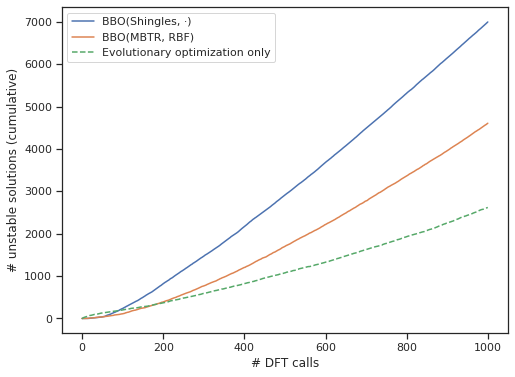

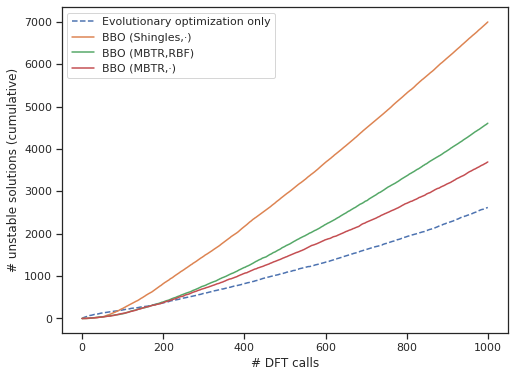

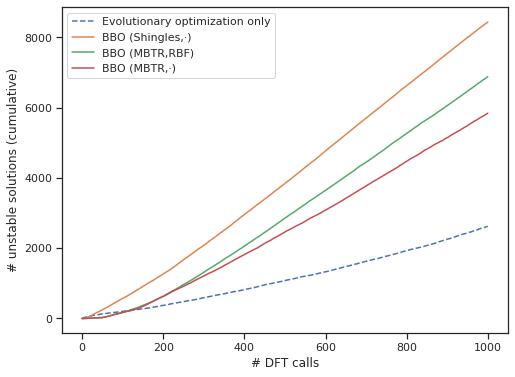

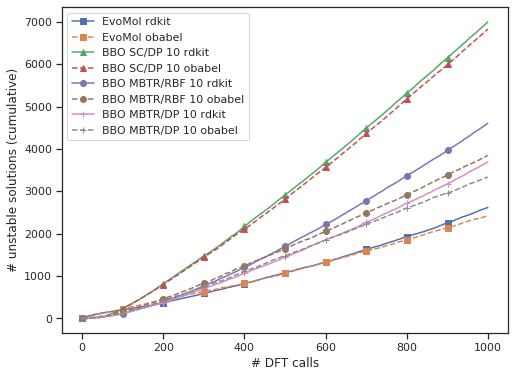

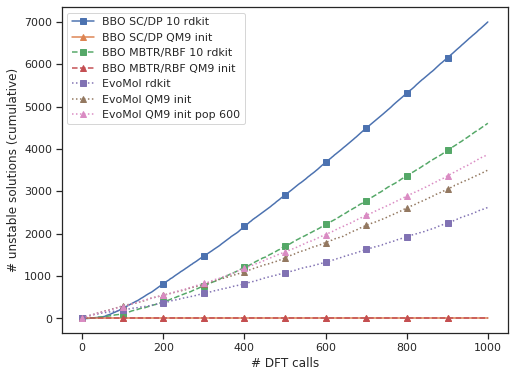

In [18]:
for group in groups:
    plot_stable_dynamics(results_dict, group[0], group[1], labels_dict=group[2], classes_dashes=group[3],
                         classes_markers=group[4])

In [19]:
evomol_max_times = np.array(results_dict["EvoMol rdkit"]["effective_last_timestamp"])

In [20]:
evomol_max_times.mean()/100

2430.983655623913